<a href="https://colab.research.google.com/github/Kokila412/ML-project/blob/main/overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [36]:
X,y=make_classification(n_samples=9000,n_features=18,n_informative=4,n_redundant=12,random_state=4)

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [38]:
train_scores=[]
test_scores=[]

In [39]:
values=[i for i in range (1,21)]

In [40]:
for i in values:
  model=DecisionTreeClassifier(max_depth=i)
  model.fit(X_train,y_train)
  train_vhat=model.predict(X_train)
  train_acc=accuracy_score(y_train,train_vhat)
  test_vhat=model.predict(X_test)
  test_acc=accuracy_score(y_train,train_vhat)
  train_scores.append(train_acc)
  test_scores.append(test_acc)
  print("train score:",train_acc)
  print("test score:",test_acc)




train score: 0.8397222222222223
test score: 0.8397222222222223
train score: 0.8551388888888889
test score: 0.8551388888888889
train score: 0.87125
test score: 0.87125
train score: 0.9020833333333333
test score: 0.9020833333333333
train score: 0.9158333333333334
test score: 0.9158333333333334
train score: 0.9268055555555555
test score: 0.9268055555555555
train score: 0.9529166666666666
test score: 0.9529166666666666
train score: 0.9663888888888889
test score: 0.9663888888888889
train score: 0.9729166666666667
test score: 0.9729166666666667
train score: 0.9794444444444445
test score: 0.9794444444444445
train score: 0.9861111111111112
test score: 0.9861111111111112
train score: 0.9908333333333333
test score: 0.9908333333333333
train score: 0.9940277777777777
test score: 0.9940277777777777
train score: 0.9963888888888889
test score: 0.9963888888888889
train score: 0.9975
test score: 0.9975
train score: 0.9981944444444445
test score: 0.9981944444444445
train score: 0.9986111111111111
test s

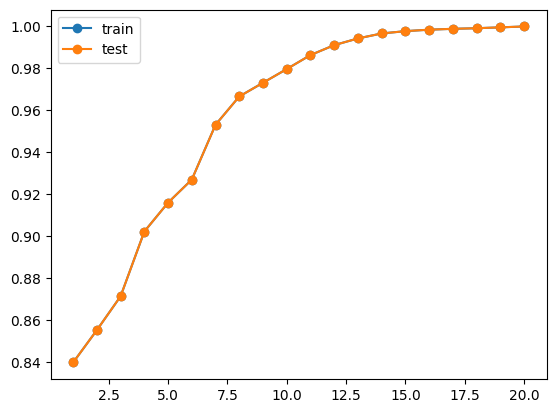

In [41]:
pyplot.plot(values,train_scores,marker='o',label='train')
pyplot.plot(values,test_scores,marker='o',label='test')
pyplot.legend()
pyplot.show()

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid={'criterion':['gini','entropy'],'max_depth':[2,4,6,10,20],'min_samples_split':[5,10,20,50,100]}
clf=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=3,n_jobs=-1,scoring="accuracy")
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [44]:
clf.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

In [45]:
print(accuracy_score(y_train,clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test,clf.best_estimator_.predict(X_test)))

0.9758333333333333
0.9372222222222222


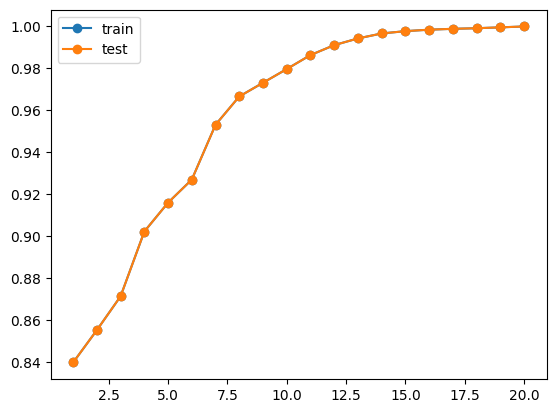

In [46]:
pyplot.plot(values,train_scores,marker='o',label='train')
pyplot.plot(values,test_scores,marker='o',label='test')
pyplot.legend()
pyplot.show()